# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
pd.set_option('display.max_columns', None)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

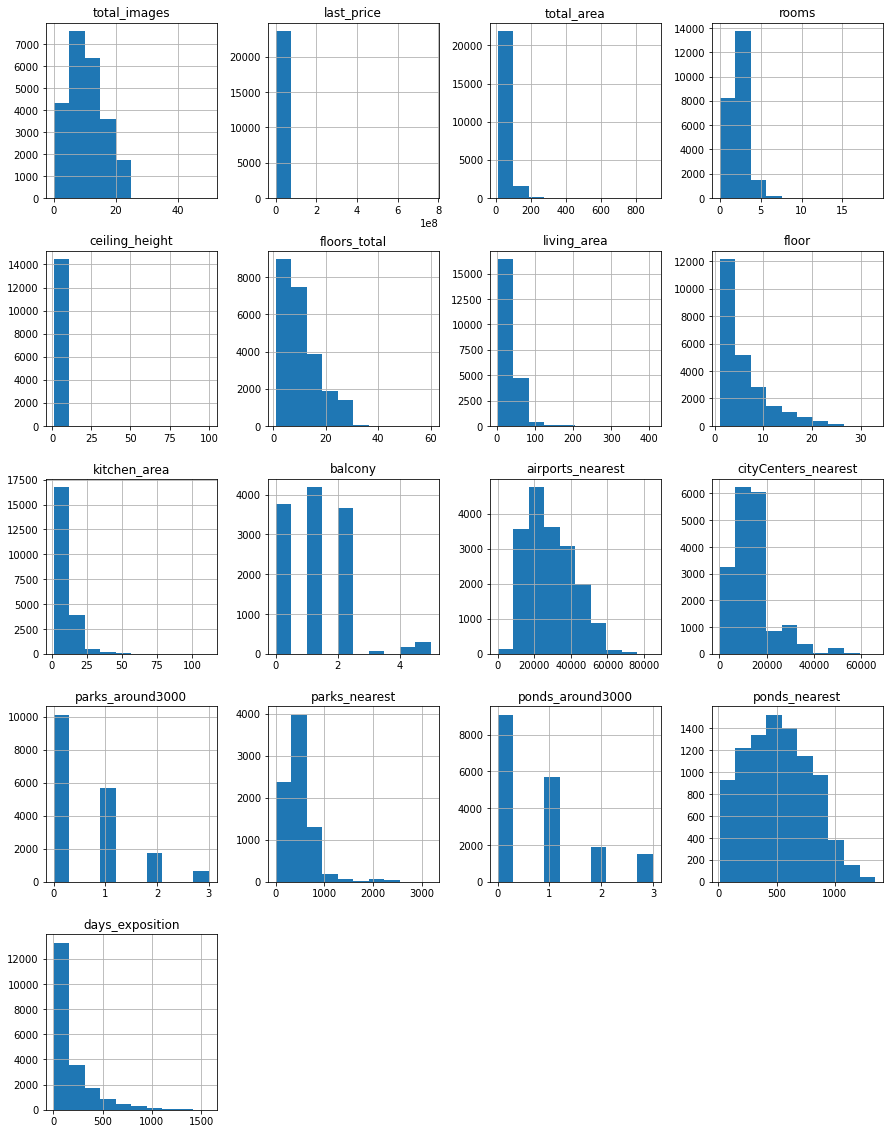

In [4]:
data.hist(figsize=(15, 20))

Судя по графикам в данных явно есть пропуски и ошибочные значения. В значении rooms, не может быть 0 комнат, по крайней мере 1 всегда есть, а также высота потолков выглядит неправдоподобно. Такие ошибки могут быть связаны с человеческим фактором или некоректным вводом данных.  
Явных дубликатов не наблюдается. 

### Выполните предобработку данных

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Чтобы лучше разобраться, что делать с пропусками в данных, надо понять, какой процент от всего набора данных они занимают. 

In [6]:
data.isna().mean() * 100

total_images             0.000000
last_price               0.000000
total_area               0.000000
first_day_exposition     0.000000
rooms                    0.000000
ceiling_height          38.799105
floors_total             0.362885
living_area              8.029875
floor                    0.000000
is_apartment            88.290645
studio                   0.000000
open_plan                0.000000
kitchen_area             9.612220
balcony                 48.605426
locality_name            0.206760
airports_nearest        23.384953
cityCenters_nearest     23.287902
parks_around3000        23.283683
parks_nearest           65.909954
ponds_around3000        23.283683
ponds_nearest           61.559559
days_exposition         13.422507
dtype: float64

In [7]:
data['is_apartment'].value_counts() #проверим в каком формате указаны ответы, где нет пропусков

False    2725
True       50
Name: is_apartment, dtype: int64

Высоту потолков(ceiling_height), количество этажей(floors_total),жилую площадь(living_area), площадь кухни(kitchen_area), количество дней размещения объявления(days_exposition) заменим медианным значением, так как оно наименее негативно скажется на дальнейшей обработке данных, пропуски в этих полях могли вознкнуть из-за невнимательности пользователей, если их заполнение было необязательным.  

Название населённого пункта(locality_name) заменяем на "другой", поскольку это категориальная переменная, и это не сильно повлиет на анализ. 

Количество балконов(balcony) заменим на 0, потому что такие пропуски логично интерпретировать как отсутствие балконов. 

Апартаменты(is_apartment) заменяем на значение False, по аналогии с количеством балконов. 

Пропуски в столбцах airports_nearest, cityCenters_nearest, parks_around3000, ponds_around3000 заменим медианой по locality_name, так как заполнение общей медианой может сильно исказить данные, стоит их уточнить по местности. 

Пропуски в parks_nearest и ponds_nearest оставим без изменений, потому что процент пропусков достаточно высокий и замена исказит анализ. 

In [8]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data.loc[data['floor'] > data['floors_total'], 'floors_total'] = data['floor']
data['living_area'] = data['living_area'].fillna(data['total_area'] * data['living_area'].mean() / data['total_area'].mean())
data['kitchen_area'] = data['kitchen_area'].fillna(data['total_area'] * data['kitchen_area'].mean() / data['total_area'].mean())

In [9]:
data = data.dropna(subset=['locality_name'])

In [10]:
data['balcony'] = data['balcony'].fillna(0)

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [13]:
#проверим теперь количество пропусков
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

В столбце first_day_exposition изменяем тип данных на datetime64, поскольку так будет удобнее проводить анализ по времени. 
В столбце is_apartment изменяем тип данных на bool, также для дальнейшего удобства. 

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])  
data['is_apartment'] = data['is_apartment'].astype(bool)

In [15]:
data['locality_name'] = data['locality_name'].str.lower() #приводим все названия к одному регистру
data['locality_name'] = data['locality_name'].str.replace('ё', 'е') #заменяем все буквы ё на е
data['locality_name'].unique() #смотрим уникальные значения, чтобы выыявить неявные дубликаты

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок городского типа красный бор', 'гатчина',
       'деревня федоровское', 'выборг', 'кронштадт', 'кировск',
       'деревня новое девяткино', 'поселок металлострой',
       'поселок городского типа лебяжье',
       'поселок городского типа сиверский', 'поселок молодцово',
       'поселок городского типа кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок городского типа ефимовский', 'поселок плодовое',
       'деревня заклинье', 'поселок торковичи', 'поселок первомайское',
       'красное село', 'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет

Прежде всего видно, что многие дубликаты возникли из-за разной интерпритации названия поселка, уберем из названий "городского типа" и уберем лишние пробелы. 

In [16]:
data['locality_name'] = data['locality_name'].str.replace('  ', ' ').str.replace('городского типа', '').str.strip()
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'городской поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок  красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок  лебяжье', 'поселок  сиверский',
       'поселок молодцово', 'поселок  кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок  ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никол

Также видим дубликаты из-за коттеджного или городского поселка, удалим и эти приписки. 

In [17]:
data['locality_name'] = data['locality_name'].str.replace('коттеджный', '').str.replace('городской', '').str.strip().str.replace('  ', ' ')
data['locality_name'].unique()

array(['санкт-петербург', 'поселок шушары', 'поселок янино-1',
       'поселок парголово', 'поселок мурино', 'ломоносов', 'сертолово',
       'петергоф', 'пушкин', 'деревня кудрово', 'коммунар', 'колпино',
       'поселок красный бор', 'гатчина', 'деревня федоровское', 'выборг',
       'кронштадт', 'кировск', 'деревня новое девяткино',
       'поселок металлострой', 'поселок лебяжье', 'поселок сиверский',
       'поселок молодцово', 'поселок кузьмоловский',
       'садовое товарищество новая ропша', 'павловск',
       'деревня пикколово', 'всеволожск', 'волхов', 'кингисепп',
       'приозерск', 'сестрорецк', 'деревня куттузи', 'поселок аннино',
       'поселок ефимовский', 'поселок плодовое', 'деревня заклинье',
       'поселок торковичи', 'поселок первомайское', 'красное село',
       'поселок понтонный', 'сясьстрой', 'деревня старая',
       'деревня лесколово', 'поселок новый свет', 'сланцы',
       'село путилово', 'ивангород', 'мурино', 'шлиссельбург',
       'никольское', 'зелено

### Добавьте в таблицу новые столбцы

In [18]:
data['metr_price'] = (data['last_price']/data['total_area']).round(2)  

data['weekday'] = pd.to_datetime(data['first_day_exposition']).dt.weekday

data['month'] = pd.to_datetime(data['first_day_exposition']).dt.month

data['year'] = pd.to_datetime(data['first_day_exposition']).dt.year

def floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_type'] = data.apply(floor, axis=1)

data['cityCenters_nearest_km'] = (data['cityCenters_nearest'] / 1000).round(0)

In [19]:
data.head() #проверяем новые столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,False,False,25.000000,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,False,False,11.000000,2.0,поселок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,False,False,8.300000,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,90.785766,9,False,False,False,27.848168,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.000000,13,False,False,False,41.000000,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,8.0


### исследовательский анализ данных

<AxesSubplot:>

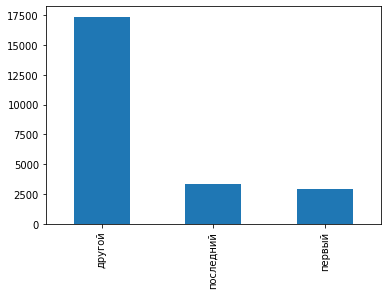

In [20]:
data['floor_type'].value_counts().plot(kind='bar')

<AxesSubplot:>

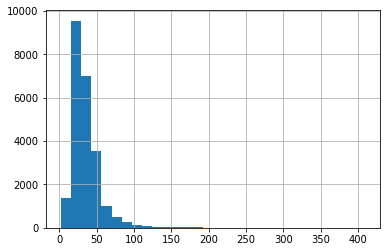

In [21]:
data['living_area'].hist(bins=30)

<AxesSubplot:>

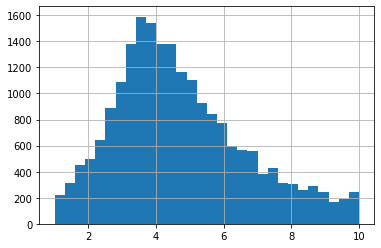

In [22]:
(data['last_price']/1000000).hist(range=(1,10),bins=30)

<AxesSubplot:>

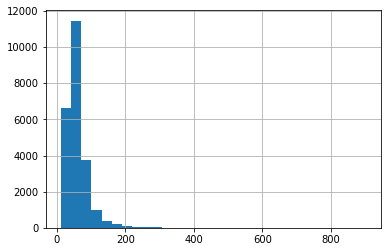

In [23]:
data['total_area'].hist(bins=30)

<AxesSubplot:>

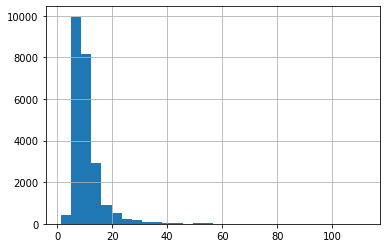

In [24]:
data['kitchen_area'].hist(bins=30)

<AxesSubplot:>

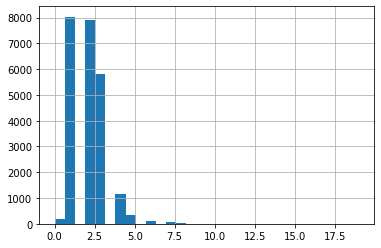

In [25]:
data['rooms'].hist(bins=30)

<AxesSubplot:>

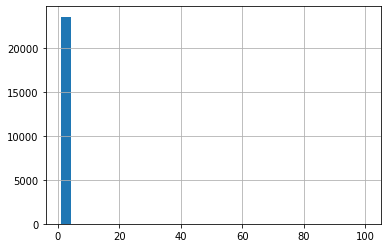

In [26]:
data['ceiling_height'].hist(bins=30)

<AxesSubplot:>

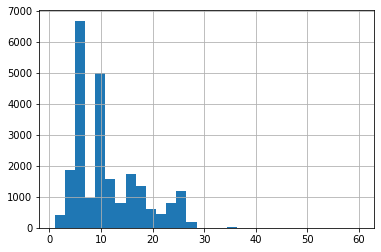

In [27]:
data['floors_total'].hist(bins=30)

<AxesSubplot:>

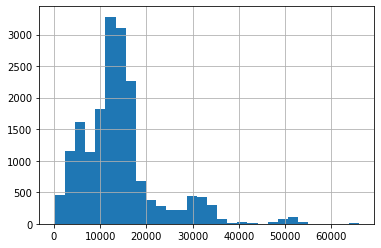

In [28]:
data['cityCenters_nearest'].hist(bins=30)

<AxesSubplot:>

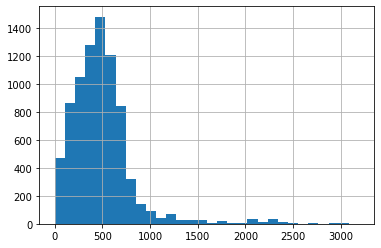

In [29]:
data['parks_nearest'].hist(bins=30)

In [30]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,metr_price,weekday,month,year,cityCenters_nearest_km
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,18116.000000,18139.000000,18140.000000,8064.000000,18140.000000,9085.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,18139.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724311,10.680803,34.582279,5.893277,10.502873,0.591712,28803.225878,14197.860742,0.611577,490.830729,0.769680,518.059879,180.753200,9.943225e+04,2.568710,6.401564,2017.370021,14.191576
std,5.682278,1.089640e+07,35.661808,1.078620,0.989255,6.589013,22.359584,4.883317,6.037438,0.959662,12637.314144,8606.830295,0.802003,342.554386,0.937948,277.841733,219.777916,5.033794e+04,1.788808,3.491418,1.037806,8.614645
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.750000,9241.000000,0.000000,288.000000,0.000000,293.000000,45.000000,7.661496e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26756.500000,13105.000000,0.000000,454.500000,1.000000,502.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,16.000000,42.100000,8.000000,12.000000,1.000000,37294.000000,16293.000000,1.000000,612.000000,1.000000,730.000000,231.000000,1.142742e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000


В столбце total_area встречаются аномально маленькие и большие квартиры, удалим значения <20 (нереально для жилых квартир) и >300 (слишком редкие выбросы)

В столбце living_area также встречаются нереалистичные значения:  
min = 2- нереально мало для жилой площади.; max = 409.7- выбивается из распределения ; также стоит проверить есть 
Чтобы исправить удалим значения <10 и >150 и строки, где living_area > total_area

По той же причине в значениях площади кухни удалим значения <5 и >50

В значениях количества комнат встречается 0-такого быть не может, заменим их на 1

В значениях высоты потолков встречаются как аномально низкие, так и высокие, в первом случае удалимм строки со значением ниже 2, а потолки с высотой боллее 10 метров, могли появиться из-за ошибки ввода, разделим такие значения на 10

In [31]:
data = data[(data['total_area'] >= 20) & (data['total_area'] <= 300)]

data = data[(data['living_area'] >= 10) & (data['living_area'] <= 150) & (data['living_area'] <= data['total_area'])]

data = data[(data['kitchen_area'] >= 5) & (data['kitchen_area'] <= 50)]

data['rooms'] = data['rooms'].replace(0, 1)

data.loc[data['ceiling_height'] > 10, 'ceiling_height'] = data['ceiling_height'] / 10

data = data[data['ceiling_height'] >= 2]

<AxesSubplot:>

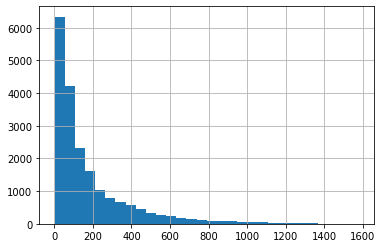

In [32]:
data['days_exposition'].hist(bins=30)

In [33]:
data['days_exposition'].mean()

181.0313944143058

In [34]:
data['days_exposition'].median()

96.0

Квартиры в среднем продаются за 169 дней, но медианное значение 95 дней — это показывает, что есть много долгих продаж, которые тянут среднее вверх. Такие значения можно считать аномально высокими, но существовать такие могут. Также есть квартиры, которые продались очень быстро, минимально- за один день, возможно, очень хорошее предложение. 

In [35]:
weekday = data.pivot_table(values='last_price', index='weekday') #создаем сводные таблицы
month = data.pivot_table(values='last_price', index='month')
year= data.pivot_table(values='last_price', index='year')

<AxesSubplot:xlabel='floor_type'>

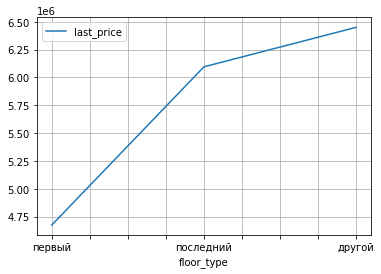

In [36]:
data.pivot_table(index='floor_type', values='last_price').sort_values(by='last_price').plot(grid=True)

Квартиры на первом этаже обладают самой низкой стоимостью, а дороже остальных квартиры не на первом и последнем этажах. 

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

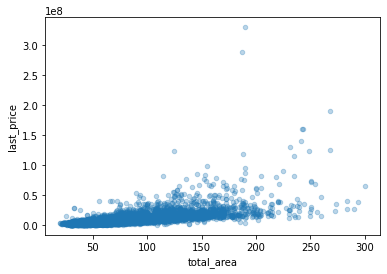

In [37]:
data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3)

Цена увеличивается вместе с площадью, что довольно логично. Но есть и несколько выбивающихся значений с слишком нетипично высокой ценой, возможно из-за элитного застройщика или места. 

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

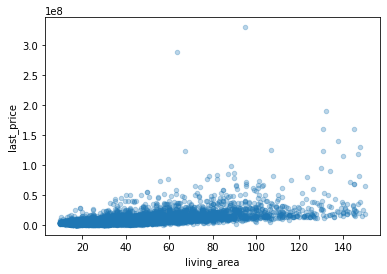

In [38]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3)

С жилой площадью все как и с общей, но мы видим большое скопление разных цен у объектов с жилой площадью около 30, на это мог повлиять этаж или расположение. 

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

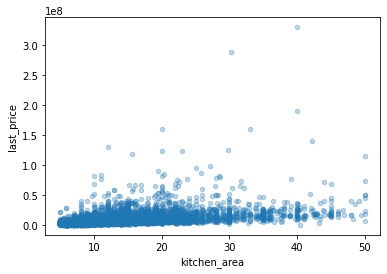

In [39]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3)

В среднем цена растет вместе с площадью кухни, но есть выбивающиеся значения, которые могли возникнуть из-за других факторов, таких как общая площадьт или расположение. 

<AxesSubplot:xlabel='rooms', ylabel='last_price'>

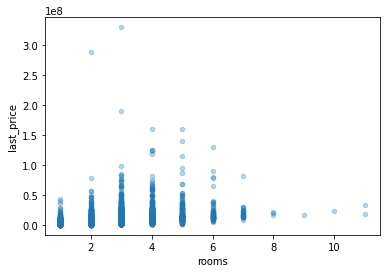

In [40]:
data.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3)

Цена квартиры растёт с увеличением числа комнат. 1–3 комнаты стоят до 1.5–2 млн , 4–6 комнат — до 2.5–3 млн. Однако выбросы (особенно для 2–3 комнат) и редкость данных для 7+ комнат искажают картину.

<AxesSubplot:xlabel='weekday'>

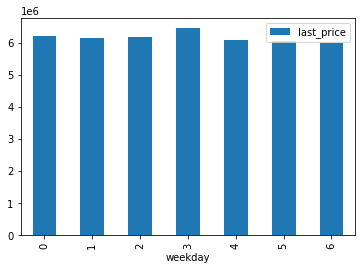

In [41]:
weekday.plot(kind='bar')

День недели почти не влияет на стоимость, однако небольшое увеличение цены происходит по четвергам. 

<AxesSubplot:xlabel='month'>

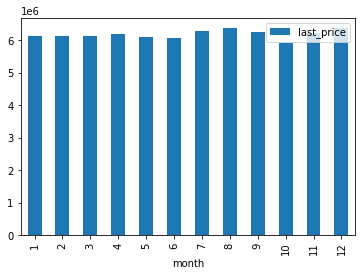

In [42]:
month.plot(kind='bar')

В среднем цена не меняется в зависимости от месяца публикации объявления, небольшое повышение происходит в августе и декабре. 

<AxesSubplot:xlabel='year'>

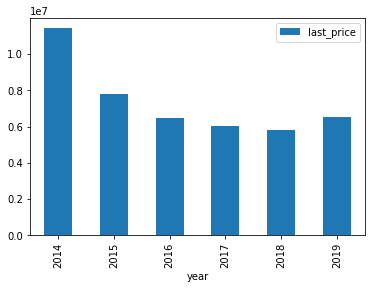

In [43]:
year.plot(kind='bar')

Объекты с самой высокой стоимостью были опубликованы в 2014 году, после чего цена начала падать, в 2019 снова наблюдается рост цен. 

In [44]:
locations_10 = data.pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count').sort_values(by='first_day_exposition', ascending=False).head(10)
locations_10.columns = ['count']
locations_10['mean_price_per_metr'] = data[data['locality_name'].isin(locations_10.index)].groupby('locality_name')['metr_price'].mean()
locations_10 = locations_10.sort_values(by='mean_price_per_metr', ascending=False)
locations_10

,count,mean_price_per_metr
locality_name,,
санкт-петербург,15317,113502.140048
пушкин,361,102991.306953
деревня кудрово,270,91851.239852
поселок парголово,324,90270.706080
поселок мурино,493,84446.129026
поселок шушары,429,78049.303124
колпино,336,75239.590804
гатчина,302,68846.422119
всеволожск,391,68693.860895


Самая высокая цена за квадратный метр наблюдается в Санкт-Петербурге, а самая низкая в Выборге. 

In [45]:
spb_data = data[data['locality_name'] == 'санкт-петербург']
spb_price = spb_data.groupby('cityCenters_nearest_km')['last_price'].mean()
spb_price


cityCenters_nearest_km
0.0     2.199051e+07
1.0     1.909701e+07
2.0     1.528263e+07
3.0     1.038954e+07
4.0     1.139713e+07
5.0     1.211982e+07
6.0     1.252497e+07
7.0     1.376318e+07
8.0     9.103955e+06
9.0     6.963980e+06
10.0    6.437226e+06
11.0    6.266972e+06
12.0    5.867656e+06
13.0    6.107055e+06
14.0    5.621952e+06
15.0    5.827375e+06
16.0    5.399024e+06
17.0    5.280955e+06
18.0    5.021741e+06
19.0    5.115954e+06
20.0    6.154039e+06
21.0    5.489381e+06
22.0    5.415524e+06
23.0    4.747630e+06
24.0    3.890687e+06
25.0    4.229080e+06
26.0    3.993577e+06
27.0    8.300000e+06
28.0    5.026429e+06
29.0    4.236667e+06
Name: last_price, dtype: float64

<AxesSubplot:xlabel='cityCenters_nearest_km'>

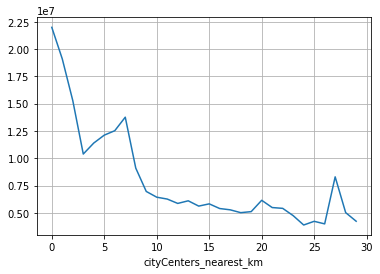

In [46]:
spb_price.plot(grid=True)

Чем ближе к центру, тем выше стоимость объекта, однако в районе 5-7 км от центра и 26-27 наблюдается скачок цен относительно других расстояний, возможно, там находится элитный жк или хорошо развитый район. 

Больше всего на цену квартиры влияют общая и жилая площади. Также есть зависимость цены от расстояния от центра. Остальные параметры не так сильно сказываются на стоимости. 

### общий вывод

В ходе проекта были проанализированы данные по поводу продажи квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. В изначальных данных присутствовади пропуски, которые возникли из-за некоректного ввода данных или человесекой ошибки. Их мы зменили медианным значением или 0, если такой вариант подрузамевался вместо пустого поля, некоторые пропуски пришлось оставить из-за невозможности подобрать оптимальную замену для них. 
Также в данных были дубликаты и выбросы, которые были переименованы и удалены соответсвенно. 

После подготовки данных был произведен их анализ. Было изучено, как влияют на стоимость такие факторы, как общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, тип этажа квартиры, общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего парка. Выяснилось, что сильнее всего на стоимость квартиры влияет площадь, а остальные факторы оказались не столь значительными. Для большей наглядности были построны графики, на которых видна эта зависимость. 

Также, выяснилось, что в 2014 году квартиры продавались с более высокой стоимостью, а далее цена падала до 2019 года, в котором снова начала расти. 

В итоге самые дорогие квартиры находятся в Санкт-Петербурге и чем ближе к его центру, тем выше стоимость. Но самым значительным параметром в ценообразовании квартиры является площадь. 